In [2]:
#Dependencies
import pandas as pd
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim_models #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:172: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [3]:
df = pd.read_csv('all extracted pdf.csv')
print(df.shape)
df

(23, 1)


,Manifesto
0,The Perspective\r The 15th State Assembly Ele...
1,MANIFESTO OF THE CONGRESS PARTY UTTAR PRADESH...
2,TAMILNADU GENERAL ASSEMBLY ELECTION - 2016 ...
3,An Appeal Inspired by the rich legacy and trad...
4,Haryana Pradesh Congress CommitteeLegislative ...
5,Namma Karnatakakke Namma Vachana A strong reso...
6,KARNATAKA MANIFESTO PROGRESS WITH CONGRESS Con...
7,Janata Dal Secular Election Party Manifesto My...
8,Janata Dal Secular Karnataka state manifesto A...
9,ASSEMBLY ELECTION KERALA LDF MANIFESTO We shou...


In [20]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [21]:
df['text_clean']=df['Manifesto'].apply(clean_text)

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['text_clean']=df['text_clean'].apply(remove_stopwords)

In [23]:
import en_core_web_md
nlp = en_core_web_md.load()

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
        output = []
        for sent in texts:
                doc = nlp(sent) 
                output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
        return output

In [24]:
text_list=df['text_clean'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[3])

manifesto congress party uttar pradesh vidhan sabha elections contents time change time uttar pradesh yaya dhikaar ikaas complete failure government congress congress partys commitments people uttar pradesh corruption free good governance order corruption free good governance justice panchayats gram sabhas empowering people education health employment food security women scheduled castes scheduled tribes backward classes elderly widows disabled minorities youth social justice social harmony productive economy efficient infrastructure power roads infrastructure agriculture industry urban rural development environment water trade commerce issues smaller states special cell implementation manifesto time change time uttar pradesh nyaya adhikaar vikaas people uttar pradesh deserve state live wholesome lives peace prosperity harmony security people uttar pradesh deserve opportunity grow economically socially make aspirations reality people uttar pradesh deserve promise protection violence cr

['appeal', 'rich', 'legacy', 'tradition', 'people', 'bengal', 'blessing', 'good', 'mamatimanush', 'government', 'journey', '20th', 'despotic', 'reign', 'regime', 'people', 'government', 'people', 'support', 'dedication', 'hard', 'work', 'successful', 'endeavour', 'bengali', 'year', 'advanced', 'greeting', 'good', 'auspicious', 'occasion', 'today', 'fourandahalf', 'year', 'general', 'election', 'great', 'pride', 'short', 'period', 'government', 'able', 'promise', 'much', 'term', 'growth', 'development', 'bengal', 'height', 'short', 'span', 'bengal', 'people', 'social', 'economic', 'cultural', 'welfare', 'overall', 'stability', 'hallowed', 'principle', 'democracy', 'outright', 'slander', 'noncooperation', 'partisan', 'union', 'government', 'natural', 'economic', 'crisis', 'hurdle', 'today', 'bengal', 'lost', 'glory', 'today', 'example', 'development', 'harmony', 'possible', 'good', 'wish', 'good', 'faith', 'people', 'enriched', 'trust', 'mother', 'brother', 'sister', 'government', 'great

In [25]:
df

,Manifesto,text_clean
0,The Perspective\r The 15th State Assembly Ele...,perspective 15th state assembly election west ...
1,MANIFESTO OF THE CONGRESS PARTY UTTAR PRADESH...,manifesto congress party uttar pradesh vidhan ...
2,TAMILNADU GENERAL ASSEMBLY ELECTION - 2016 ...,tamilnadu general assembly election congress e...
3,An Appeal Inspired by the rich legacy and trad...,appeal inspired rich legacy tradition people b...
4,Haryana Pradesh Congress CommitteeLegislative ...,haryana pradesh congress committeelegislative ...
5,Namma Karnatakakke Namma Vachana A strong reso...,namma karnatakakke namma vachana strong resolv...
6,KARNATAKA MANIFESTO PROGRESS WITH CONGRESS Con...,karnataka manifesto progress congress contents...
7,Janata Dal Secular Election Party Manifesto My...,janata secular election party manifesto appeal...
8,Janata Dal Secular Karnataka state manifesto A...,janata secular karnataka state manifesto assem...
9,ASSEMBLY ELECTION KERALA LDF MANIFESTO We shou...,assembly election kerala manifesto kerala secu...


In [26]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]
print(dictionary.num_nnz)
print(len(doc_term_matrix))

24763
23


In [27]:

lda = gensim.models.ldamodel.LdaModel

In [31]:
num_topics=8
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,iterations=100)

Wall time: 26.4 s


In [32]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.017*"government" + 0.014*"state" + 0.011*"development" + 0.009*"karnataka" + 0.008*"people" + 0.007*"year" + 0.007*"bengal" + 0.007*"lakh" + 0.005*"project" + 0.005*"centre"'),
 (1,
  '0.014*"government" + 0.013*"state" + 0.011*"assam" + 0.009*"development" + 0.007*"land" + 0.007*"year" + 0.007*"month" + 0.006*"education" + 0.006*"district" + 0.006*"woman"'),
 (2,
  '0.014*"state" + 0.011*"government" + 0.008*"scheme" + 0.008*"development" + 0.007*"city" + 0.007*"water" + 0.007*"woman" + 0.006*"farmer" + 0.006*"special" + 0.005*"policy"'),
 (3,
  '0.000*"government" + 0.000*"development" + 0.000*"state" + 0.000*"policy" + 0.000*"year" + 0.000*"scheme" + 0.000*"system" + 0.000*"sector" + 0.000*"land" + 0.000*"power"'),
 (4,
  '0.016*"government" + 0.013*"state" + 0.008*"development" + 0.008*"scheme" + 0.008*"kerala" + 0.007*"sector" + 0.006*"project" + 0.006*"people" + 0.006*"year" + 0.005*"water"'),
 (5,
  '0.013*"delhi" + 0.011*"government" + 0.007*"center" + 0.006*"central"

In [33]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [36]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix,total_docs=23))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.626491088676641

Coherence Score:  0.3194749056272261


In [37]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

In [40]:
import matplotlib.pyplot as plt

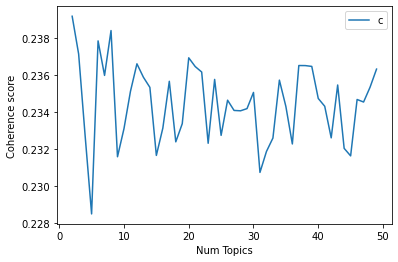

In [41]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [42]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2392
Num Topics = 3  has Coherence Value of 0.2371
Num Topics = 4  has Coherence Value of 0.2327
Num Topics = 5  has Coherence Value of 0.2285
Num Topics = 6  has Coherence Value of 0.2378
Num Topics = 7  has Coherence Value of 0.236
Num Topics = 8  has Coherence Value of 0.2384
Num Topics = 9  has Coherence Value of 0.2316
Num Topics = 10  has Coherence Value of 0.2331
Num Topics = 11  has Coherence Value of 0.2351
Num Topics = 12  has Coherence Value of 0.2366
Num Topics = 13  has Coherence Value of 0.2359
Num Topics = 14  has Coherence Value of 0.2353
Num Topics = 15  has Coherence Value of 0.2316
Num Topics = 16  has Coherence Value of 0.2331
Num Topics = 17  has Coherence Value of 0.2357
Num Topics = 18  has Coherence Value of 0.2324
Num Topics = 19  has Coherence Value of 0.2334
Num Topics = 20  has Coherence Value of 0.2369
Num Topics = 21  has Coherence Value of 0.2365
Num Topics = 22  has Coherence Value of 0.2362
Num Topics = 23  has C